In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/ML/Bootcamp/Assignment4

/content/drive/My Drive/ML/Bootcamp/Assignment4


#**Introduction**

This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA

In [4]:
dataframe =  pd.read_csv('Melbourne_housing_FULL.csv')
dataframe["Date"] = pd.to_datetime(dataframe["Date"])
dataframe = dataframe.sort_values('Date').reset_index()

In [5]:
def collectdata(type,room):
  a = pd.to_datetime(dataframe[(dataframe['Type']==type)&(dataframe['Rooms']==room)]['Date'])
  b = dataframe[(dataframe['Type']==f'{type}')&(dataframe['Rooms']==room)]['Price']
  d= {"Date":a,"Price":b}
  data= pd.DataFrame(data=d)
  data = data.dropna().reset_index().set_index('Date')
  return data

In [6]:
def plotprice(data,room,type):
  # plt.figure(figsize=(10,5))
  plt.plot(data)
  plt.title(f"The price of {room} rooms {type} from 2016 to 2018")
  # axes[i,j].ylim(0,lim)
  plt.xlabel("Time")
  plt.ylabel("Price")
  # axes[i].grid(True)
  plt.show()

#**Visulization many kind of houses with different rooms**

According to dataset documentation, 'Rooms' and 'Bedroom' both contain information on the number of rooms of a home has, but reported from different sources.

Text(0, 0.5, 'Price')

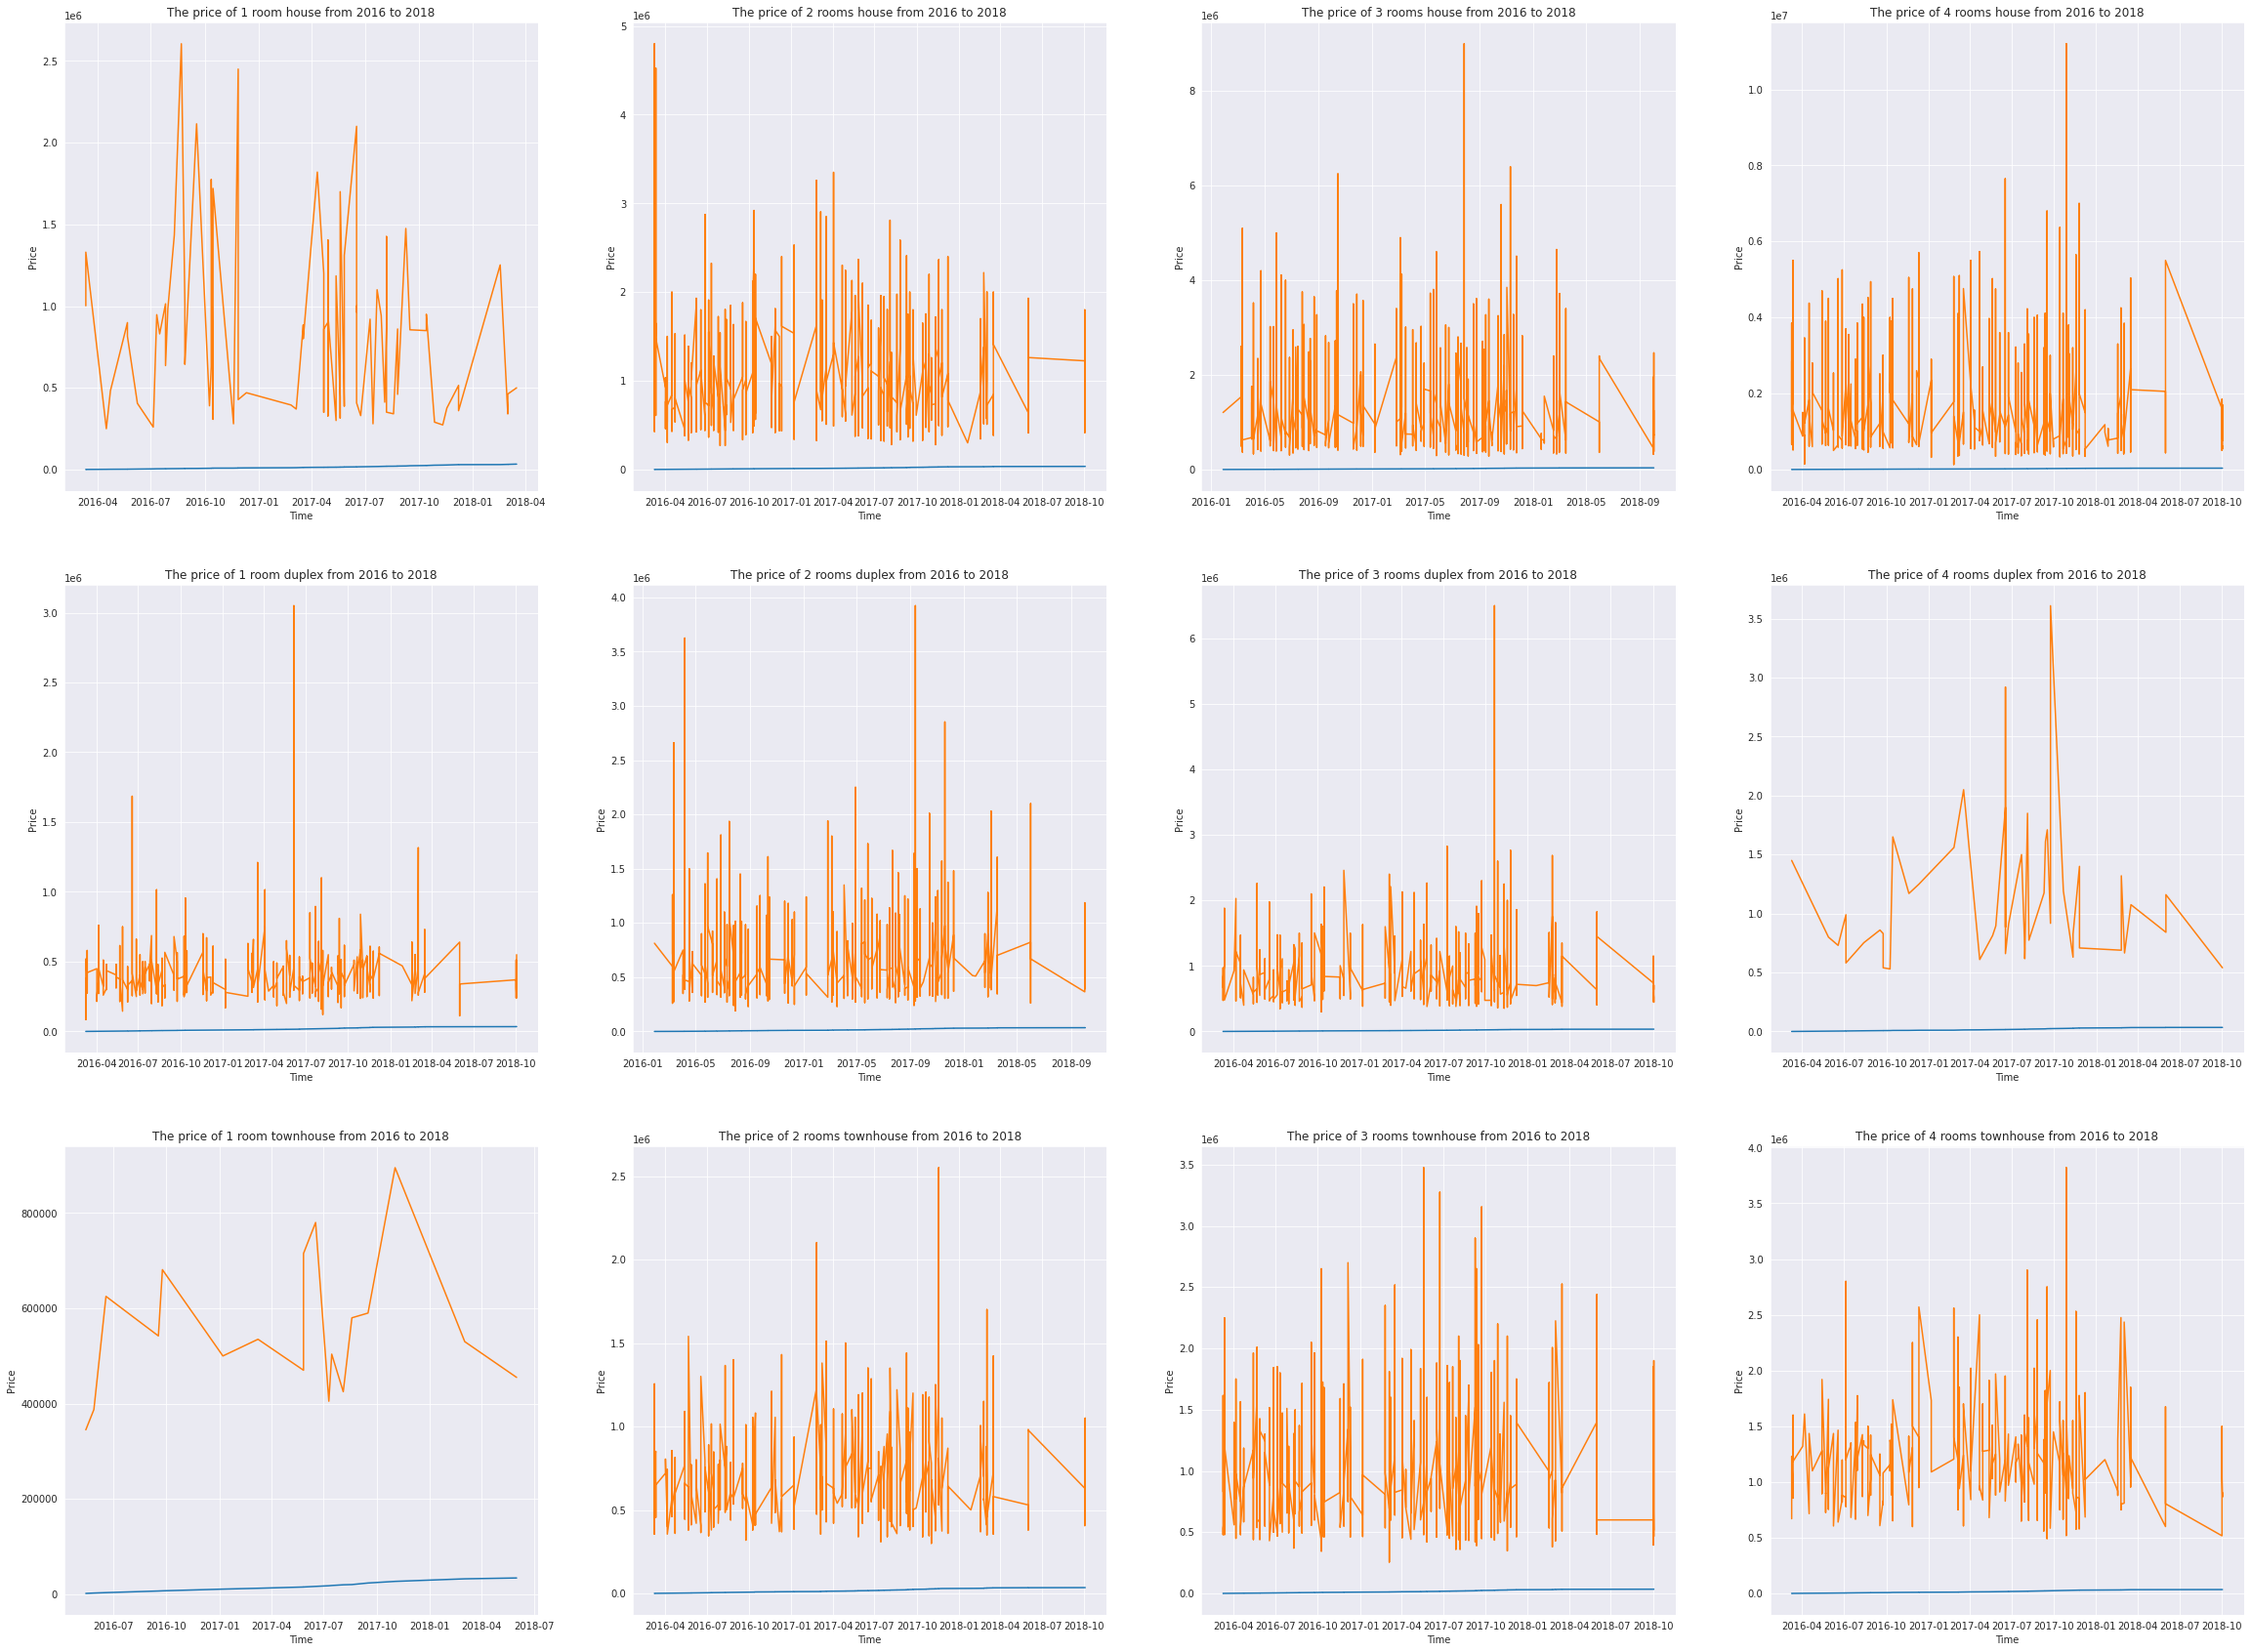

In [29]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(3,4,figsize = (40,30))

ax[0,0].plot(collectdata('h',1))
ax[0,0].set_title("The price of 1 room house from 2016 to 2018")
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Price')

ax[0,1].plot(collectdata('h',2))
ax[0,1].set_title("The price of 2 rooms house from 2016 to 2018")
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Price')

ax[0,2].plot(collectdata('h',3))
ax[0,2].set_title("The price of 3 rooms house from 2016 to 2018")
ax[0,2].set_xlabel('Time')
ax[0,2].set_ylabel('Price')

ax[0,3].plot(collectdata('h',4))
ax[0,3].set_title("The price of 4 rooms house from 2016 to 2018")
ax[0,3].set_xlabel('Time')
ax[0,3].set_ylabel('Price')

ax[1,0].plot(collectdata('u',1))
ax[1,0].set_title("The price of 1 room duplex from 2016 to 2018")
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Price')

ax[1,1].plot(collectdata('u',2))
ax[1,1].set_title("The price of 2 rooms duplex from 2016 to 2018")
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('Price')

ax[1,2].plot(collectdata('u',3))
ax[1,2].set_title("The price of 3 rooms duplex from 2016 to 2018")
ax[1,2].set_xlabel('Time')
ax[1,2].set_ylabel('Price')

ax[1,3].plot(collectdata('u',4))
ax[1,3].set_title("The price of 4 rooms duplex from 2016 to 2018")
ax[1,3].set_xlabel('Time')
ax[1,3].set_ylabel('Price')

ax[2,0].plot(collectdata('t',1))
ax[2,0].set_title("The price of 1 room townhouse from 2016 to 2018")
ax[2,0].set_xlabel('Time')
ax[2,0].set_ylabel('Price')

ax[2,1].plot(collectdata('t',2))
ax[2,1].set_title("The price of 2 rooms townhouse from 2016 to 2018")
ax[2,1].set_xlabel('Time')
ax[2,1].set_ylabel('Price')

ax[2,2].plot(collectdata('t',3))
ax[2,2].set_title("The price of 3 rooms townhouse from 2016 to 2018")
ax[2,2].set_xlabel('Time')
ax[2,2].set_ylabel('Price')

ax[2,3].plot(collectdata('t',4))
ax[2,3].set_title("The price of 4 rooms townhouse from 2016 to 2018")
ax[2,3].set_xlabel('Time')
ax[2,3].set_ylabel('Price')

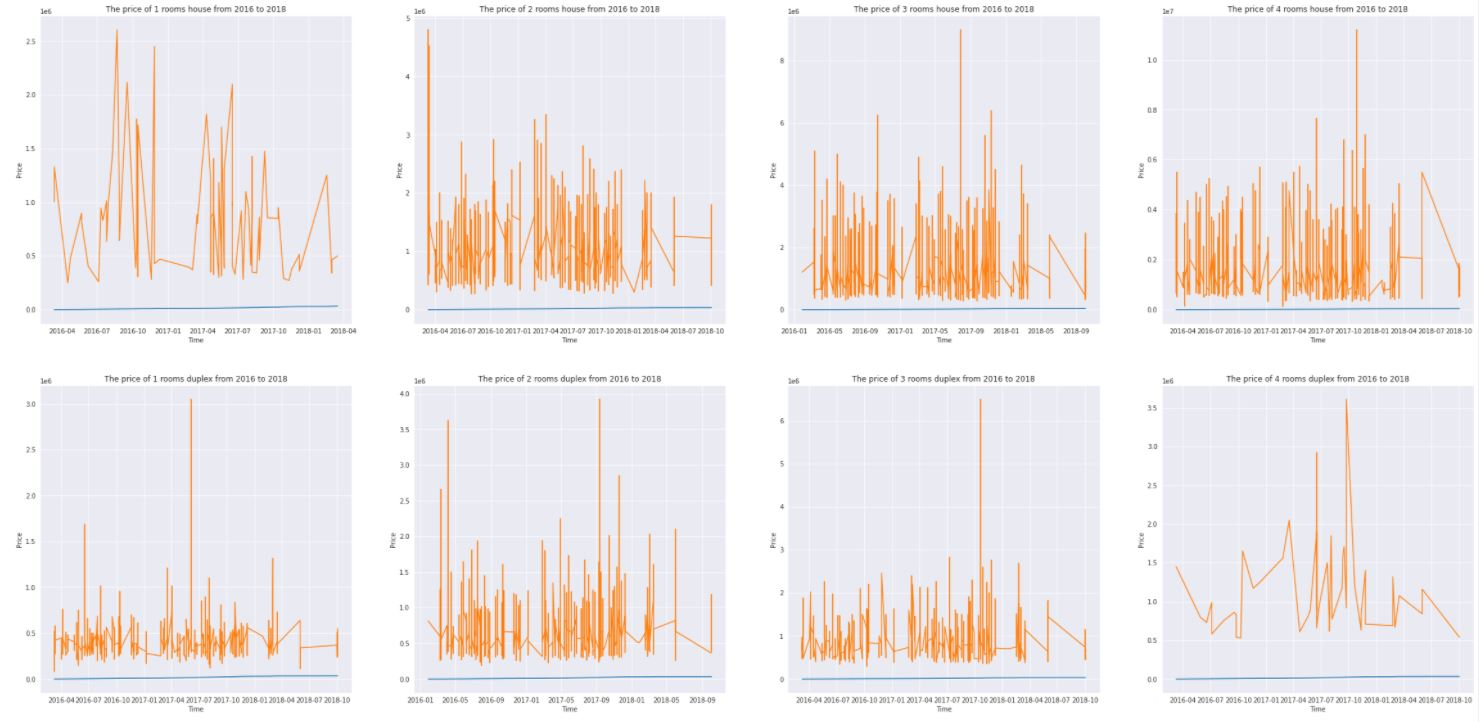

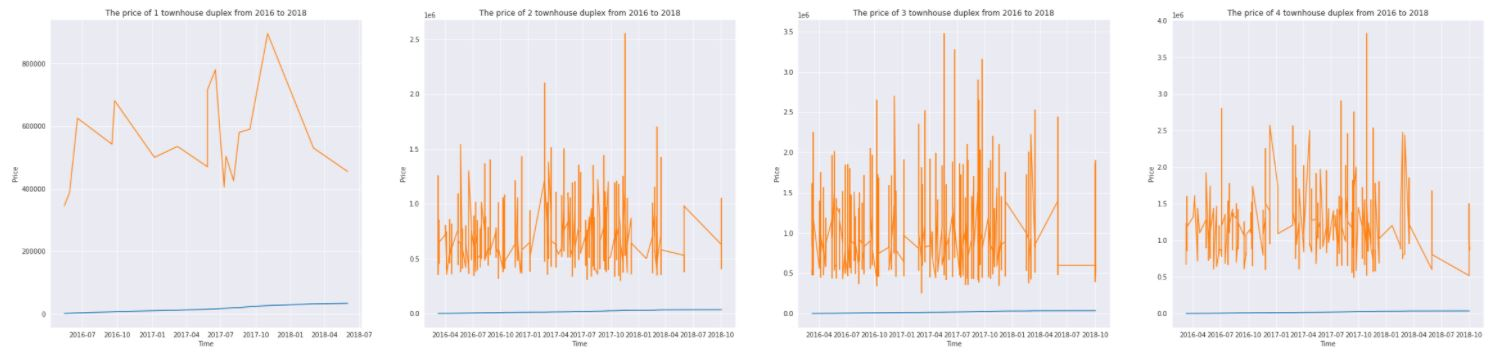

###In general, the more rooms, the higher price.

#**Homoscedasticity**

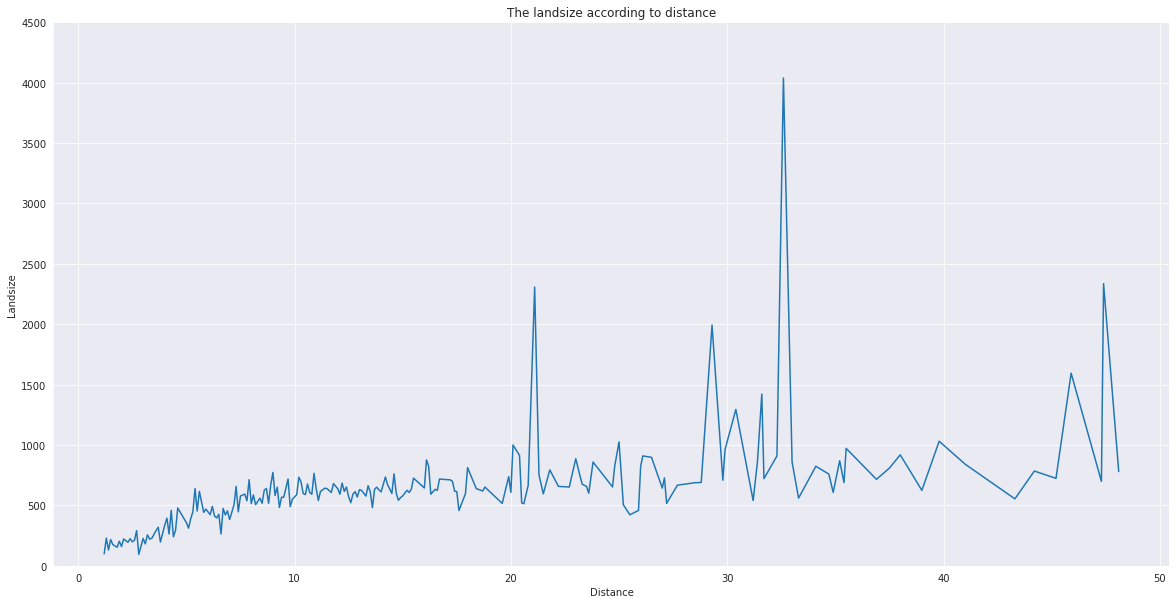

In [8]:
plt.figure(figsize=(20,10))
plt.plot(dataframe[(dataframe["Rooms"]>2) & (dataframe["Type"] == "h")& (dataframe["Landsize"] <5000)][["Landsize","Distance"]].dropna().groupby("Distance").mean())
plt.title("The landsize according to distance")
plt.ylim(0,4500)
plt.xlabel("Distance")
plt.ylabel("Landsize")
plt.grid(True)
plt.show()

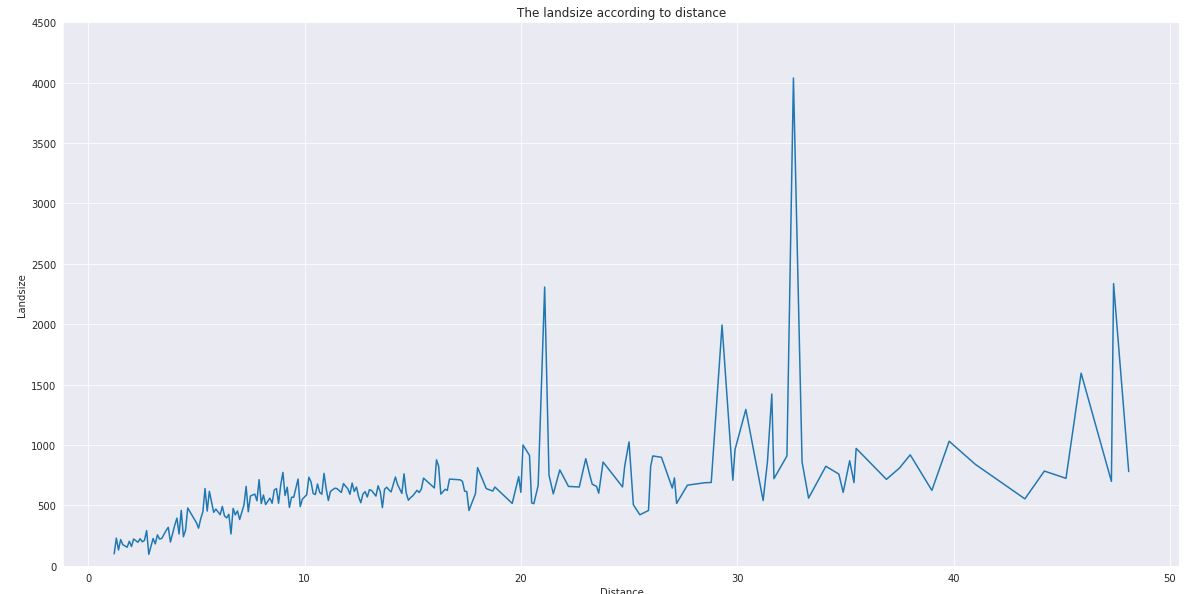

###The longer distance, the bigger landsize.

In [ ]:
sns.lmplot("Distance","Price",dataframe[(dataframe["Rooms"]<=5) & 
                                         (dataframe["Rooms"]>= 2) &                                         
                                        (dataframe["Type"]=="h") &
                                        (dataframe["Price"]< 1000000)
                                       ].dropna(),hue="Rooms", size=10)

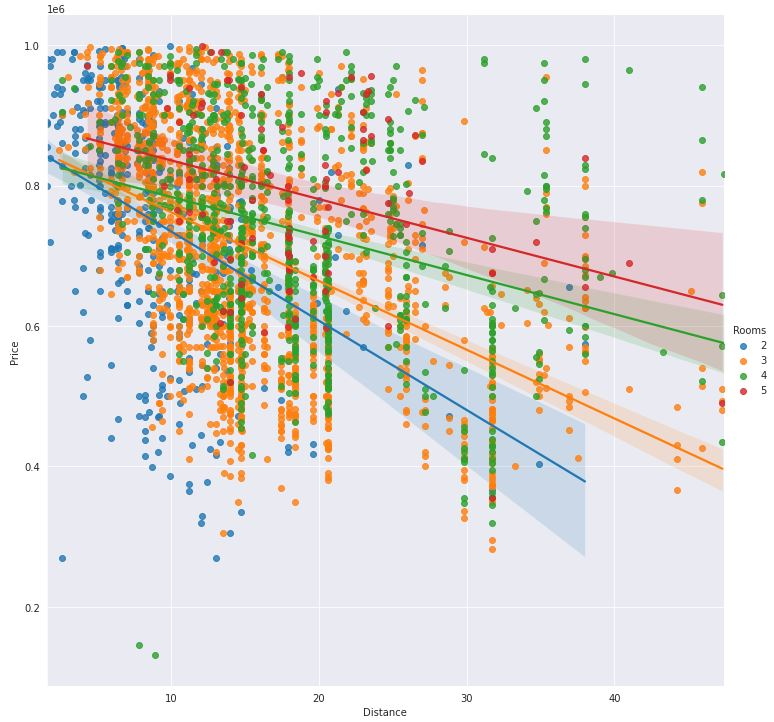

###From the graph above, we can clearly see that the longer distance, the cheaper price.

##**Correlation**

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(dataframe[dataframe["Type"] == "h"].corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})

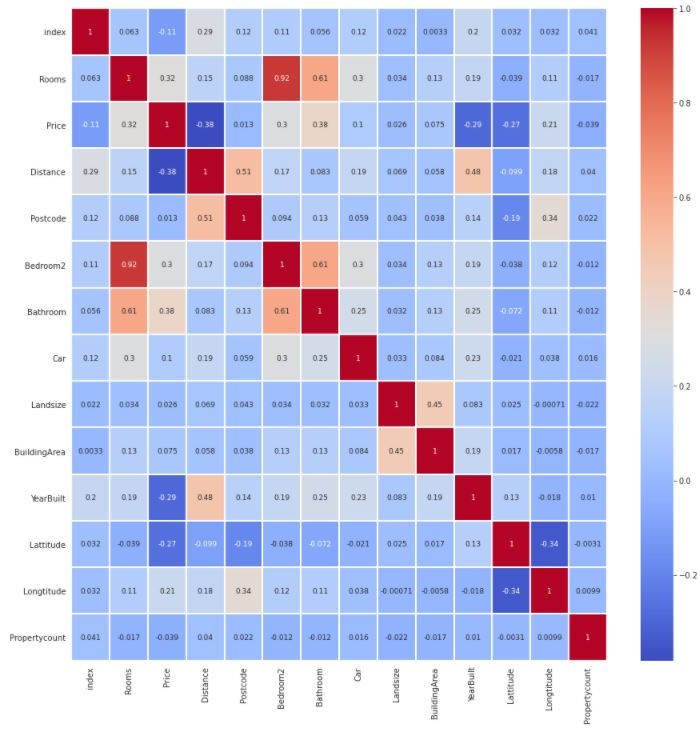

**Weak Positive Correlation**

Age and Price

**Moderate Positive Correlation**

Rooms and Price

Bathrooms and Price

Building Area and Price

The Rooms, Bathroom, and BuildingArea features are also moderately correlated with one another as they are all measures of home size.

#**LINEAR REGRESSION**

In [11]:
dataframe_dr = dataframe.dropna().sort_values("Date").reset_index()
days_since_start = [(x - dataframe_dr["Date"].min()).days for x in dataframe_dr["Date"]]
dataframe_dr["Days"] = days_since_start
suburb_dummies = pd.get_dummies(dataframe_dr[["Type", "Method",'CouncilArea','Regionname']])

In [15]:
X = dataframe_dr.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(suburb_dummies)
y = dataframe_dr["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [16]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [ ]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

###**RMSE**: 374219.92635211267

### **RMSE** tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are $374,219.93 away from the actual value.

##**Residual**

In [ ]:
sns.distplot((y_test-predictions),bins=50)

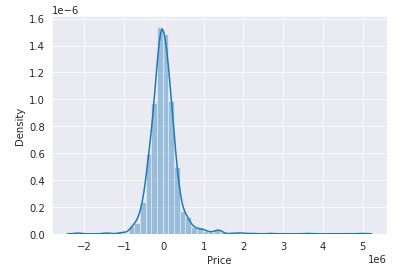

##**Apply the model for prediction with holdout and cross validation**

###**Holdout**

In [ ]:
print('R^2 =',metrics.explained_variance_score(y_test,predictions))

R^2 = 0.6857074012670448

In [ ]:
metrics.r2_score(y_test, predictions)

R^2 = 0.6855022014130838

According to the **R-squared**, **68.55%** of the variance in the dependent variable is explained by the model.

###**Cross validation**

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores   

array([0.70872895, 0.57240457, 0.69180557, 0.68539195, 0.7043131 ])

Compared to Holdout, Cross validation is more performance

##**Using PCA, apply the model with holdout and cross validation**

###**Holdout with PCA**

In [22]:
pca = PCA(n_components=36,whiten=True)
pca.fit(X_train)
X_trainpca = pca.transform(X_train)

# y_trainpca = pca.fit(y_train)

In [23]:
pca.fit(X_test)
X_testpca = pca.transform(X_test)

In [24]:
lm = LinearRegression()
lm.fit(X_trainpca,y_train)
predictionspca = lm.predict(X_testpca)

In [ ]:
metrics.r2_score(y_test, predictionspca)

R^2 = 0.31944006998949326

According to the **R-squared, 31.19%** of the variance in the dependent variable is explained by the model.

In [26]:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictionspca)))

RMSE: 550492.7377286205


RMSE: 550492.3544430526

RMSE tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are $550,492.35 away from the actual value.

###**Cross validation with PCA**

In [28]:
foldspca = KFold(n_splits = 5, shuffle = True, random_state = 100)
scorespca = cross_val_score(lm, X_trainpca, y_train, scoring='r2', cv=folds)
scorespca

array([0.6933912 , 0.5525925 , 0.67753383, 0.67021369, 0.6947151 ])

array([0.69339101, 0.55259288, 0.67753379, 0.67021337, 0.69471481])

Apply PCA with Cross validation is better than Holdout with PCA

#**In conclusion**

Generally, there are some correlations between price and rooms, distance or landsize.

Besides, apply Cross validation is better than Holdout.

The peformance of linear regression is pretty well.